### Packages Needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pymannkendall as mk
from scipy.stats import theilslopes 
from matplotlib.offsetbox import AnchoredText

### Create three year pre- and post- fire CI

In [16]:
# Watersheds and area
Watersheds=['Chilko','Chilcotin','Osilinka','Mesilinka','Stellako','Nautley'] #['Spius','Nation']
Area=[6800,19200,1950,3060,4020,6552]#[775,6790]
Seasons=['A','Sp','Su','F','W']

#loop through the seasons
for S in Seasons:
    Climate_Index=[]; Fire_Index=[];Fire_ECA=[]; Runoff=[];Data_Span=[];FY=[];WS_ARRAY=[];Precip=[]
    
    #loop through the watersheds
    for count, WS in enumerate(Watersheds):
        
        #load the climate and fire summary data
        CI= pd.read_excel('D:/UNBC/HydroMet_Project/Data/ERA5_land/ERA5_land_Climate_Index.xlsx', sheet_name=WS)
        ECA = pd.read_csv('D:/UNBC/HydroMet_Project/Data/ForestFires/Fire_Summary/%s.csv'%WS)
    
        #extract years where fire  bruned >5% area
        Fire_Year= ECA[(ECA.Percent>=5)].Year.values

        
        #mean runoff and Standard deviation of runoff
        Avg_Run=np.nanmean(CI[(CI.Season=='A')].Obs_Runoff.values)
        SD_Run=np.nanstd(CI[(CI.Season=='A')].Obs_Runoff.values)
        
        # for year fire year in the watershed
        if len(Fire_Year)>0:
            for yc in Fire_Year:
                
                #climate index +3 and -3 years from forest fire year
                Climate_Index.append((CI[(CI.Season==S)&((CI.Year>=yc-3)&(CI.Year<=yc+3))].NPA-
                                      CI[(CI.Season==S) & ((CI.Year>=yc-3)&(CI.Year<=yc+3))].NTA).values)
                
                #NPA +3 and -3 years from forest fire year
                Precip.append(CI[(CI.Season==S)&((CI.Year>=yc-3)&(CI.Year<=yc+3))].NPA.values)
                
                #Fire year
                FY.append(yc)
                
                #fire size
                Fire_ECA.append(ECA[ECA.Year==yc].Percent.values[0])
                
                #Normlaized Runoff anomaly
                Runoff.append((CI[(CI.Season=='A')&((CI.Year>=yc-3)&(CI.Year<=yc+3))].Obs_Runoff.values-Avg_Run)/SD_Run)
                
                #dates of +3 and -3 from fire year
                Data_Span.append(CI[(CI.Season=='A')&((CI.Year>=yc-3)&(CI.Year<=yc+3))].Year.values)

                #save watershed name
                WS_ARRAY.append(WS)
    
    #create +3 to -3  year summary of climate and runoff
    if S=='W':
        R_Winter= pd.DataFrame({'Fire_Year':FY,'WS':WS_ARRAY,'Fire_ECA':Fire_ECA,'Precip':Precip,
                      'CI+-3yr':Climate_Index,'Runoff+-3yr':Runoff,'DataSpan':Data_Span})
    elif S=='A':
        R_Annual= pd.DataFrame({'Fire_Year':FY,'WS':WS_ARRAY,'Fire_ECA':Fire_ECA,'Precip':Precip,
                      'CI+-3yr':Climate_Index,'Runoff+-3yr':Runoff,'DataSpan':Data_Span})
    elif S=='Sp':
        R_Spring= pd.DataFrame({'Fire_Year':FY,'WS':WS_ARRAY,'Fire_ECA':Fire_ECA,'Precip':Precip,
                      'CI+-3yr':Climate_Index,'Runoff+-3yr':Runoff,'DataSpan':Data_Span})
    elif S=='Su':
        R_Summer= pd.DataFrame({'Fire_Year':FY,'WS':WS_ARRAY,'Fire_ECA':Fire_ECA,'Precip':Precip,
                      'CI+-3yr':Climate_Index,'Runoff+-3yr':Runoff,'DataSpan':Data_Span})
    elif S=='F':
        R_Fall= pd.DataFrame({'Fire_Year':FY,'WS':WS_ARRAY,'Fire_ECA':Fire_ECA,'Precip':Precip,
                      'CI+-3yr':Climate_Index,'Runoff+-3yr':Runoff,'DataSpan':Data_Span})

### Calculate yearly normalized runoff/precip anomaly 

In [3]:
#Watersheds
Watersheds=['Spius','Chilko','Chilcotin','Nation','Osilinka','Mesilinka','Stellako','Nautley']

#initilize dataframes for each season
Results_Diff=pd.DataFrame(); Results_Summer=pd.DataFrame(); Results_Fall=pd.DataFrame(); Results_Spring=pd.DataFrame()

#loop through watersheds
for WS in Watersheds:
    Precip_TB= pd.read_excel('D:/UNBC/HydroMet_Project/Data/ERA5_land/Summary_ERA5_land_Monthly.xlsx', sheet_name=WS)

    Precip=[];Runoff=[];Precip_S=[];Runoff_S=[];Precip_Sp=[];Runoff_Sp=[];Precip_F=[];Runoff_F=[]
    for year in np.arange(1982,2020):
        if year ==2019:
            if WS in ['Spius','Chilko','Nation','Osilinka','Mesilinka']:
                Precip.append(np.nan); Runoff.append(np.nan)
                Precip_S.append(np.nan); Runoff_S.append(np.nan)
                Precip_Sp.append(np.nan); Runoff_Sp.append(np.nan)
                Precip_F.append(np.nan); Runoff_F.append(np.nan)
                continue
                
        Precip.append(np.sum(Precip_TB[((Precip_TB.Year==year) & (Precip_TB.Month<10))|
                                       ((Precip_TB.Year==year-1) & (Precip_TB.Month>=10))]['Avg Precip']))
        Runoff.append(np.sum(Precip_TB[((Precip_TB.Year==year) & (Precip_TB.Month<10))|
                                       ((Precip_TB.Year==year-1) & (Precip_TB.Month>=10))]['Discharge_obs']))
        
        Precip_F.append(np.sum(Precip_TB[(Precip_TB.Year==year) & ((Precip_TB.Month==9)|(Precip_TB.Month==10)|
                                                                  (Precip_TB.Month==11))]['Avg Precip']))
        Runoff_F.append(np.sum(Precip_TB[(Precip_TB.Year==year) & ((Precip_TB.Month==9)|(Precip_TB.Month==10)|
                                                                  (Precip_TB.Month==11))]['Discharge_obs']))
        
        Precip_Sp.append(np.sum(Precip_TB[(Precip_TB.Year==year) & ((Precip_TB.Month==3)|(Precip_TB.Month==4)|
                                                                  (Precip_TB.Month==5))]['Avg Precip']))
        Runoff_Sp.append(np.sum(Precip_TB[(Precip_TB.Year==year) & ((Precip_TB.Month==3)|(Precip_TB.Month==4)|
                                                                  (Precip_TB.Month==5))]['Discharge_obs']))
        
        Precip_S.append(np.sum(Precip_TB[(Precip_TB.Year==year) & ((Precip_TB.Month==6)|(Precip_TB.Month==7)|
                                                                  (Precip_TB.Month==8))]['Avg Precip']))
        Runoff_S.append(np.sum(Precip_TB[(Precip_TB.Year==year) & ((Precip_TB.Month==6)|(Precip_TB.Month==7)|
                                                                  (Precip_TB.Month==8))]['Discharge_obs']))
    Precip=np.array(Precip); Runoff=np.array(Runoff)
    Precip_S=np.array(Precip_S); Runoff_S=np.array(Runoff_S)
    Precip_Sp=np.array(Precip_Sp); Runoff_Sp=np.array(Runoff_Sp)
    Precip_F=np.array(Precip_F); Runoff_F=np.array(Runoff_F)

    Diff_Index= ((Runoff/Precip)-np.nanmean(Runoff/Precip))/np.nanstd(Runoff/Precip)
    
    Sum_Index= ((Runoff_S/Precip_S)-np.nanmean(Runoff_S/Precip_S))/np.nanstd(Runoff_S/Precip_S)
    
    Fall_Index= ((Runoff_F/Precip_F)-np.nanmean(Runoff_F/Precip_F))/np.nanstd(Runoff_F/Precip_F)
    
    Sp_Index= ((Runoff_Sp/Precip_Sp)-np.nanmean(Runoff_Sp/Precip_Sp))/np.nanstd(Runoff_Sp/Precip_Sp)
#     Diff_Index= (Diff-np.nanmean(Diff))/np.nanstd(Diff)
    # Precip_Index=Tb[(Tb.Season=='A')].NPA.values

    Results_Diff= Results_Diff.append({'WS':WS,'Year':np.arange(1982,2020),'Run-Precip_IDX':Diff_Index},ignore_index=True)
    Results_Summer=Results_Summer.append({'WS':WS,'Year':np.arange(1982,2020),'Run-Precip_IDX':Sum_Index},ignore_index=True)
    Results_Fall=Results_Fall.append({'WS':WS,'Year':np.arange(1982,2020),'Run-Precip_IDX':Fall_Index},ignore_index=True)
    Results_Spring=Results_Spring.append({'WS':WS,'Year':np.arange(1982,2020),'Run-Precip_IDX':Sp_Index},ignore_index=True)

### Identifying extreme R/P values prior to and after forest fires

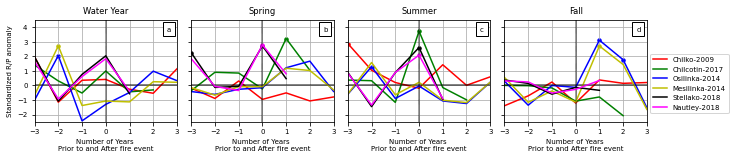

In [18]:
Seasons=[Results_Diff,Results_Spring,Results_Summer,Results_Fall]
Names=['Water Year','Spring', 'Summer','Fall']

#Extract Fire year, watershed, and percent burned
R=R_Summer
FI_year=R.Fire_Year.values
FI_WS=R.WS.values
FI_Percent=R.Fire_ECA.values

#How many fire years there are
FI=len(FI_year)

#------------------------------------------- initiate plotting------------------------------------------
def cm2inch(*tupl):### plots in cm 
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
Color=['r','g','b','y','k','magenta']
L=['a','b','c','d']

fig,ax=plt.subplots(1,4,figsize=cm2inch(27,6),sharex=True, sharey=True)
fig.subplots_adjust(bottom=0.3, top=0.9, hspace=0.15, left=0.05, right=0.85, wspace=0.1)

font = {'family' : 'sans-serif', 'weight' : 'normal',  'size'   : 7}
plt.rc('font', **font)

xi=[0,0,0,0,1,1,1,1]
yi=[0,1,2,3,0,1,2,3]

#---------------------------------------Runoff analysis------------------------------------------------
#loop through seasons
for I,S in enumerate(Seasons):
    
    #loop through watersheds with forest fires
    for count,WS in enumerate(FI_WS):
        Year= FI_year[count]

        #select the +3 to-3 years of forest fire
        Working_Y= S[S.WS==WS].Year.values[0]
        IX= np.where((Working_Y<=Year+3)&(Working_Y>=Year-3))
        
        #extract the 95% of runoff/precip index threshold --> representing maximum
        Max= np.nanquantile(S[S.WS==WS]['Run-Precip_IDX'].values[0],0.95)
        
        #extract runoff/precip index
        Working_D = S[S.WS==WS]['Run-Precip_IDX'].values[0]

        Span=np.arange(-3,-3+len(IX[0]))
        
        #plot +3 to -3 years of R/P index
        ax[I].plot(Span,Working_D[IX],linewidth=1.5, color=Color[count],label='%s-%s'%(WS,Year))
        
        #determine if any points exceed the 95% of R/P index values
        High= np.where(Working_D[IX]>=Max)
        
        #if R/P  exceeds 95%, then plot them as points on plot
        if len(High)>0:
            for H in High:
                ax[I].scatter(Span[H],Working_D[IX][H],color=Color[count],s=12)
        

        #-----------------------------------Plotting constraints---------------------------
        ax[I].set_xlim(-3,3)
        ax[I].set_ylim(-2.5,4.5)
        ax[I].set_title('%s'%Names[I])
        ax[I].axvline(0, color='k',linestyle='--', linewidth=0.2)
        ax[I].axhline(0, color='k',linewidth=0.2)
        ax[I].grid(b=True,axis='both')
        
        if I==0:
            ax[I].set_ylabel('Standardized R/P anomaly')
       
        ax[I].set_xlabel('Number of Years \nPrior to and After fire event')
        if I==3:
            ax[I].legend(bbox_to_anchor=(1,.7),)
        
            
    at = AnchoredText(L[I], frameon=True, loc='upper right')
    at.patch.set_boxstyle("Square,pad=0.15")
    ax[I].add_artist(at)
    
      
Path_Figs='C:/Users/margo.DESKTOP-T66VM01/Desktop/UNBC/Writting_Drafts/Manuscripts_for_submission/Figures/'
# fig.savefig(Path_Figs+'Figure4.pdf',dpi=700)

### Extreme R/P events compared to precipitation

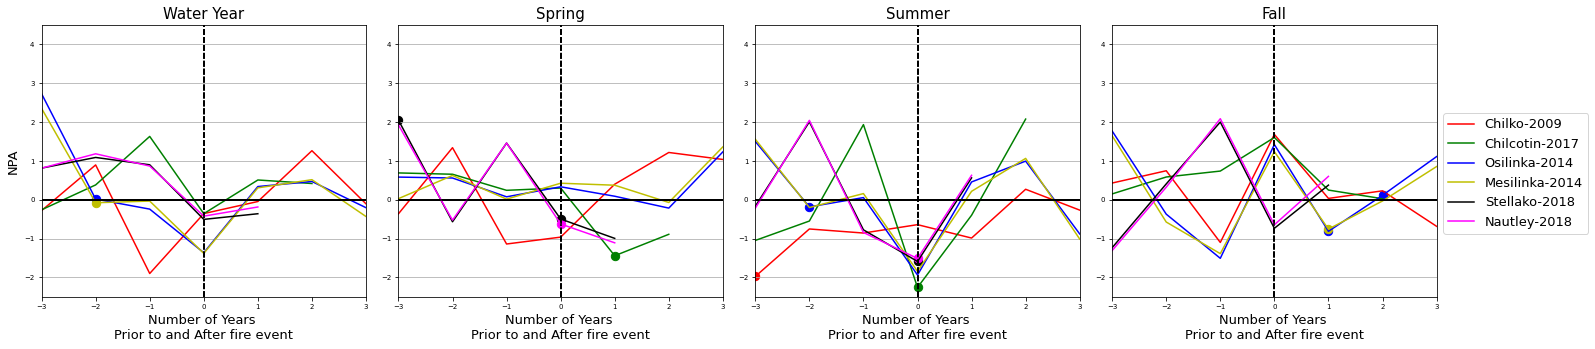

In [23]:
# Extract fire year,watersheds, and area burned data
R=R_Summer
FI_year=R.Fire_Year.values
FI_WS=R.WS.values
FI_Percent=R.Fire_ECA.values

#Number of forest fires
FI=len(FI_year)

#arrays to loop through
Seasons=[Results_Diff,Results_Spring,Results_Summer,Results_Fall]
RUN=[R_Annual, R_Spring, R_Summer,R_Fall]
Names=['Water Year','Spring', 'Summer','Fall']

#--------------------------------------Initilize plotting-----------------------
Color=['r','g','b','y','k','magenta']

fig,ax=plt.subplots(1,4,figsize=(25,5))
fig.subplots_adjust(hspace=.2,wspace=0.1)
xi=[0,0,0,0,1,1,1,1]
yi=[0,1,2,3,0,1,2,3]



for I,S in enumerate(Seasons):
    
    #select the results
    R=RUN[I]
    
    #loop through watersheds
    for count,WS in enumerate(FI_WS):
        Year= FI_year[count]
        
        #select three years before and after forest fires
        Working_Y= S[S.WS==WS].Year.values[0]
        IX= np.where((Working_Y<=Year+3)&(Working_Y>=Year-3))
        
        #select NPA data from results
        Working_D = R[R.WS==WS]['Precip'].values[0]
        
        #determine the 95% of the R/P index values 
        Max= np.nanquantile(S[S.WS==WS]['Run-Precip_IDX'].values[0],0.95)
        
        
        # plot the NPA data for the three years before and after the forest fire
        Span=np.arange(-3,-3+len(IX[0]))
        ax[I].plot(Span,Working_D,linewidth=1.5, color=Color[count],label='%s-%s'%(WS,Year))
        
        #Extract R/P index that exceeded the 95%
        High= np.where(S[S.WS==WS]['Run-Precip_IDX'].values[0][IX]>=Max)
        
        #put a dot on any precip values where, during the same year,R/P index exceeded the 95%
        if len(High)>0:
            for H in High:
                ax[I].scatter(Span[H],Working_D[H],color=Color[count],s=70)
            

        #----------------------------- plotting parameters-------------------------
        ax[I].set_xlim(-3,3)
        ax[I].set_ylim(-2.5,4.5)
        ax[I].set_title('%s'%Names[I],size=15)
        ax[I].axvline(0, color='k',linestyle='--')
        ax[I].axhline(0, color='k')
        ax[I].grid(b=True,axis='y')


        if I==0:
            ax[I].set_ylabel('NPA',fontsize=13)
       
        ax[I].set_xlabel('Number of Years \nPrior to and After fire event', fontsize=13)
        if I==3:
            ax[I].legend(bbox_to_anchor=(1,.7),prop={'size': 13})
    
   